# scaling

In [60]:
# import zipfile

### extracting a zip file

In [61]:
# with zipfile.ZipFile("melb_data.csv.zip", "r") as myzip:
#     myzip.extractall()

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, 
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression


from xgboost import XGBRegressor
from catboost import CatBoostClassifier
from lightgbm import LGBMRegressor

In [84]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [64]:
pd.set_option("display.max_column", None)

In [65]:
mel = pd.read_csv("melb_data.csv")

In [66]:
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [67]:
mel.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### drop features = [Suburb, Address, Date,SellerG, Price, Regionname ] 
### encode = [Type, Method]

In [68]:
mel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [69]:
round((mel.isnull().sum()/len(mel))*100)

Suburb            0.0
Address           0.0
Rooms             0.0
Type              0.0
Price             0.0
Method            0.0
SellerG           0.0
Date              0.0
Distance          0.0
Postcode          0.0
Bedroom2          0.0
Bathroom          0.0
Car               0.0
Landsize          0.0
BuildingArea     47.0
YearBuilt        40.0
CouncilArea      10.0
Lattitude         0.0
Longtitude        0.0
Regionname        0.0
Propertycount     0.0
dtype: float64

Text(0.5, 1.0, 'Building')

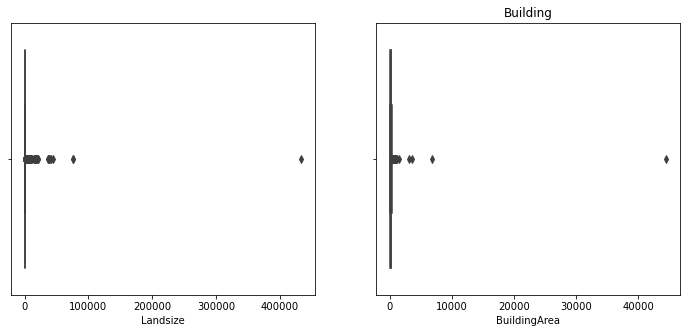

In [70]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(x=mel["Landsize"])
plt.subplot(122)
sns.boxplot(x=mel["BuildingArea"])
plt.title("Building")

In [71]:
mel.groupby("Rooms").mean()["BuildingArea"]

Rooms
1      52.618506
2      92.872142
3     139.147184
4     208.965073
5     405.607347
6     278.513889
7     340.423333
8     256.000000
10           NaN
Name: BuildingArea, dtype: float64

In [72]:
mel.query("Rooms == 10")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11304,Bundoora,5 Ball Ct,10,h,900000.0,PI,Ray,15/07/2017,12.1,3083.0,10.0,3.0,2.0,313.0,NaN,2006.0,Darebin,-37.71098,145.05381,Northern Metropolitan,10175.0


In [73]:
mel.drop(index=11304, inplace=True)

In [74]:
# mel.loc[11304]

In [75]:
rm_mean = mel.groupby("Rooms").mean()["BuildingArea"]
rm_mean.groupby("rooms").mean()["buid"]

Rooms
1     52.618506
2     92.872142
3    139.147184
4    208.965073
5    405.607347
6    278.513889
7    340.423333
8    256.000000
Name: BuildingArea, dtype: float64

In [76]:
# cols = ["Rooms", "BuildingArea"]

# Function to fill building area with mean wrt to room
def input_mean(cols):
    Rooms = cols[0]
    BuildingArea = cols[1]
    
#     checking the building area column with missing values
    if pd.isnull(BuildingArea):
        for i in rm_mean.index:
            if Rooms == i:
                return round(rm_mean[i])
    
    else:
        return BuildingArea
                

In [77]:
# applying function above to fill in missing values
mel["BuildingArea"] = mel[["Rooms", "BuildingArea"]].apply(input_mean, axis=1)

In [78]:
mel["BuildingArea"].isnull().sum()

0

In [79]:
# confirming the mean with above
mel.groupby("Rooms").mean()["BuildingArea"]

Rooms
1     52.805051
2     92.934564
3    139.074255
4    208.979808
5    405.770733
6    278.738806
7    340.254000
8    256.000000
Name: BuildingArea, dtype: float64

In [85]:
sc = StandardScaler()
mm = MinMaxScaler()

In [88]:
col_names = ["Landsize", "BuildingArea" ]
features = mel[col_names]
features.values

array([[202.,  93.],
       [156.,  79.],
       [134., 150.],
       ...,
       [436., 139.],
       [866., 157.],
       [362., 112.]])

In [89]:
df = mel.copy()

In [90]:
df[col_names] = mm.fit_transform(features)

In [91]:
df[col_names]

,Landsize,BuildingArea
0,0.000466,0.002089
1,0.000360,0.001775
2,0.000309,0.003370
3,0.000217,0.003123
4,0.000277,0.003190
...,...,...
13575,0.001506,0.004695
13576,0.000769,0.002988
13577,0.001007,0.003123
13578,0.002000,0.003527


Text(0.5, 1.0, 'Building')

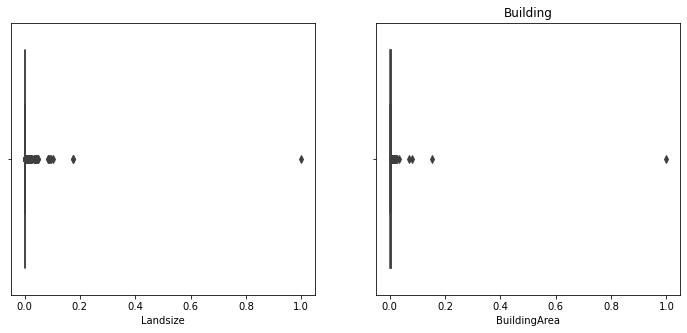

In [92]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(x=df["Landsize"])
plt.subplot(122)
sns.boxplot(x=df["BuildingArea"])
plt.title("Building")

In [93]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13579.000000,1.357900e+04,13579.000000,13579.000000,13579.000000,13579.000000,13517.000000,13579.000000,13579.000000,8204.000000,13579.000000,13579.000000,13579.000000
mean,2.937477,1.075697e+06,10.137632,3105.303557,2.914206,1.534134,1.610047,0.001290,0.003343,1964.679181,-37.809210,144.995212,7454.217026
std,0.953860,6.393325e+05,5.868917,90.680101,0.964041,0.691623,0.962663,0.009216,0.008870,37.273242,0.079258,0.103918,4378.680756
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,0.000409,0.002089,1940.000000,-37.856825,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,0.001016,0.003123,1970.000000,-37.802360,145.000100,6543.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,0.001503,0.003729,1999.000000,-37.756410,145.058310,10331.000000
max,8.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,1.000000,1.000000,2018.000000,-37.408530,145.526350,21650.000000


In [95]:
mel.query("BuildingArea == BuildingArea.max() | Landsize == Landsize.max()")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11020,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,3.0,3.0,1.0,433014.0,139.0,NaN,Yarra,-37.79751,144.98309,Northern Metropolitan,5825.0
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,5.0,3.0,5.0,44500.0,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0


In [97]:
df2 = mel.copy()

In [98]:
df2.drop([11020,13245], inplace=True)

In [104]:
mel.sort_values("BuildingArea", ascending=False).head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,5.0,3.0,5.0,44500.0,44515.0000,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0
1484,Bulleen,19 Warringal St,4,h,1280000.0,S,Barry,11/03/2017,11.8,3105.0,4.0,1.0,2.0,732.0,6791.0000,NaN,Manningham,-37.76150,145.08970,Eastern Metropolitan,4480.0
2560,Fitzroy North,186 Queens Pde,2,t,930000.0,S,Nelson,3/09/2016,3.5,3068.0,2.0,3.0,0.0,2778.0,3558.0000,NaN,Yarra,-37.79030,144.98590,Northern Metropolitan,6244.0
1588,Camberwell,46 Athelstan Rd,5,h,2608000.0,S,Marshall,15/10/2016,7.8,3124.0,5.0,2.0,4.0,730.0,3112.0000,1920.0,Boroondara,-37.84240,145.06390,Southern Metropolitan,8920.0
2234,Elsternwick,5/16 St Georges Rd,2,u,741000.0,S,Biggin,16/04/2016,8.5,3185.0,3.0,1.0,1.0,0.0,1561.0000,1966.0,Glen Eira,-37.88290,145.00330,Southern Metropolitan,4898.0
2830,Glen Iris,1/58 Edgar St N,2,t,600000.0,VB,Gary,22/08/2016,9.2,3146.0,2.0,1.0,1.0,0.0,1143.0000,NaN,Stonnington,-37.85060,145.04650,Southern Metropolitan,10412.0
1368,Brunswick,7 Garnet St,3,h,1053000.0,S,Ray,27/06/2016,5.2,3056.0,3.0,1.0,1.0,343.0,1041.0000,1925.0,Moreland,-37.75890,144.95290,Northern Metropolitan,11918.0
3640,Kew,24 Fitzwilliam St,5,h,1975000.0,S,Kay,18/06/2016,5.6,3101.0,3.0,2.0,1.0,531.0,1022.0000,1890.0,Boroondara,-37.81300,145.04110,Southern Metropolitan,10331.0
12064,Lalor,52 Monash St,3,h,580500.0,S,Love,29/07/2017,16.3,3075.0,3.0,1.0,1.0,532.0,934.0000,1980.0,Whittlesea,-37.66101,145.02568,Northern Metropolitan,8279.0
10920,Brighton,23 Arthur Av,5,h,3000000.0,VB,Buxton,12/08/2017,10.5,3186.0,5.0,3.0,2.0,818.0,826.8367,NaN,Bayside,-37.92335,144.99982,Southern Metropolitan,10579.0


In [106]:
select_k = SelectKBest(chi2, k=7)
rfe = RFE(LinearRegression(), n_features_to_select=7)

In [125]:
drop_cols = ["Suburb", "Address", "Date","SellerG","CouncilArea"] 
encode_col = ["Type", "Method","Regionname"]
# 

In [126]:
df.isnull().sum()

Rooms                                       0
Distance                                    0
Postcode                                    0
Bedroom2                                    0
Bathroom                                    0
Car                                        62
Landsize                                    0
BuildingArea                                0
YearBuilt                                5375
Lattitude                                   0
Longtitude                                  0
Propertycount                               0
Type_t                                      0
Type_u                                      0
Method_S                                    0
Method_SA                                   0
Method_SP                                   0
Method_VB                                   0
Regionname_Eastern Victoria                 0
Regionname_Northern Metropolitan            0
Regionname_Northern Victoria                0
Regionname_South-Eastern Metropoli

<AxesSubplot:>

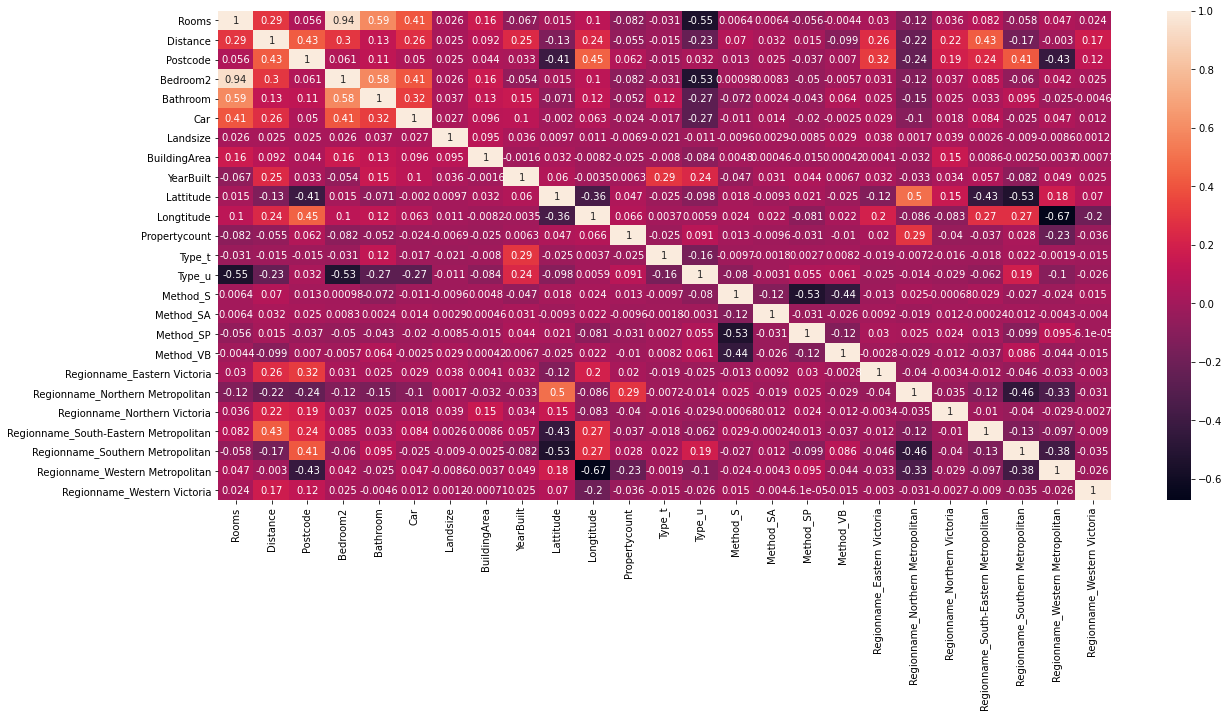

In [127]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot=True)

In [135]:
df = mel.drop(drop_cols, axis=1)
df = pd.get_dummies(df, columns=encode_col, drop_first=True)
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,93.0,NaN,-37.7996,144.9984,4019.0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,139.0,NaN,-37.7969,144.9969,4019.0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [136]:
df.fillna(0, inplace=True)
df.isnull().sum()

Rooms                                    0
Price                                    0
Distance                                 0
Postcode                                 0
Bedroom2                                 0
Bathroom                                 0
Car                                      0
Landsize                                 0
BuildingArea                             0
YearBuilt                                0
Lattitude                                0
Longtitude                               0
Propertycount                            0
Type_t                                   0
Type_u                                   0
Method_S                                 0
Method_SA                                0
Method_SP                                0
Method_VB                                0
Regionname_Eastern Victoria              0
Regionname_Northern Metropolitan         0
Regionname_Northern Victoria             0
Regionname_South-Eastern Metropolitan    0
Regionname_

In [137]:
X_feature = df.drop("Price", axis = 1)
y = df.Price



In [138]:
rfe.fit(X_feature,y)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [140]:
# we didnt use kbest due to it not working on negative values , ie lat and longitude
select_k.fit(X_feature, y)

ValueError: Input X must be non-negative.

In [141]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
        True, False,  True, False,  True, False,  True])

In [146]:
X_feature.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'Type_t', 'Type_u', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object')

In [147]:
X_feature.columns[rfe.support_]

Index(['Longtitude', 'Type_t', 'Type_u', 'Regionname_Eastern Victoria',
       'Regionname_Northern Victoria', 'Regionname_Southern Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object')

<AxesSubplot:>

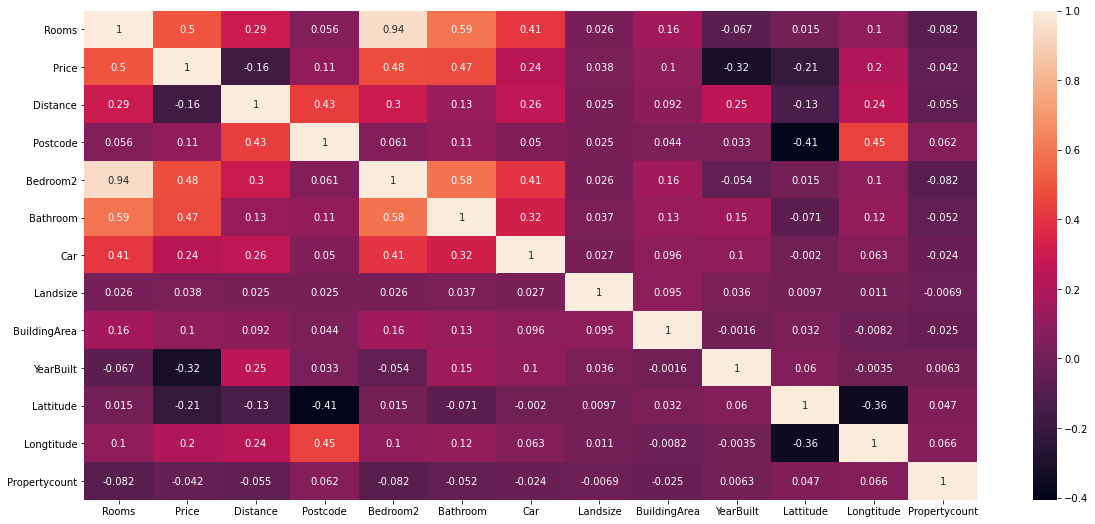

In [148]:
plt.figure(figsize=(20,9))
sns.heatmap(mel.corr(), annot=True)